# Introduction to the Case study

**Business context.** Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment 

**Problem statement.** You want to identify "A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals."

**Analytical context.** We will be working on a dataset that looking at historic survival of the patients. As a data scientist, you are given a responsibility to create a machine learning model that would predict the chances of survival of a patient after 1 year of treatment so a hospital in the province of Greenland can improve its care conditions.

# Importing the packages for data analysis

In [1]:
#!pip install xgboost

# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise
import missingno as msno

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [2]:
#Loading the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

# Let's have a look at data


This data set contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
Survived_1_year == 1, implies that the patient survived after 1 year of treatment

Data Description:

1. ID_Patient_Care_Situation: Care situation of a patient during treatment
2. Diagnosed_Condition: The diagnosed condition of the patient
3. ID_Patient: Patient identifier number
4. Treatment_with_drugs: Class of drugs used during treatment
5. Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
6. Patient_Age: Age of the patient
7. Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
8. Patient_Smoker: If the patient was a smoker or not
9. Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
10. Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

In [3]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [4]:
pharma_data.shape

(23097, 18)

In [5]:
pharma_data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [6]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


some strange values here: 
- the min Diagnozed_condition and Patient_Age is 0,000000 - most likely to be a null values
- the min A,B,C,D,E,F is 0,00000 - it is null values

In [7]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
ID_Patient_Care_Situation    23097 non-null int64
Diagnosed_Condition          23097 non-null int64
Patient_ID                   23097 non-null int64
Treated_with_drugs           23084 non-null object
Patient_Age                  23097 non-null int64
Patient_Body_Mass_Index      23097 non-null float64
Patient_Smoker               23097 non-null object
Patient_Rural_Urban          23097 non-null object
Patient_mental_condition     23097 non-null object
A                            21862 non-null float64
B                            21862 non-null float64
C                            21862 non-null float64
D                            21862 non-null float64
E                            21862 non-null float64
F                            21862 non-null float64
Z                            21862 non-null float64
Number_of_prev_cond          21862 non-null float64
Survived_1_year    

In [8]:
#find unique value
pharma_data.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10570
Treated_with_drugs              32
Patient_Age                     78
Patient_Body_Mass_Index      10570
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              5
Survived_1_year                  2
dtype: int64

# Let's Take a Look at the Categorical data

In [9]:
pharma_data['Treated_with_drugs'].nunique()

32

In [10]:
pharma_data['Patient_Smoker'].nunique()

3

In [11]:
pharma_data['Patient_Rural_Urban'].nunique()

2

In [12]:
pharma_data['Patient_mental_condition'].nunique()

1

# Target Variable check

In [13]:
pharma_data['Survived_1_year'].nunique()

2

In [14]:
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

# Data preparation process: *Data Wrangling*

## Checking null values

In [15]:
pharma_data[pharma_data['Diagnosed_Condition']==0]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [16]:
pharma_data['Diagnosed_Condition'].median()

26.0

In [17]:
pharma_data['Diagnosed_Condition'] = pharma_data['Diagnosed_Condition'].replace(0,pharma_data['Diagnosed_Condition'].median())

There are 13 Diagnosed_Condition with 0 values.
0 values replace by Diagnosed_Condition median.

In [18]:
pharma_data[pharma_data['Patient_Age']==0]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
270,23979,36,410,DX6,0,17.824390,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
354,31586,15,7033,DX1 DX3,0,17.620936,NO,RURAL,Stable,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1
382,16270,45,10829,DX6,0,28.782161,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
383,13729,12,8385,DX6,0,17.420418,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0
439,10039,51,4354,DX6,0,25.405622,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,10115,51,5210,DX6,0,29.808723,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
22766,10770,31,7654,DX1,0,23.645485,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0
22972,18581,13,9178,DX5,0,27.636765,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
22989,32522,8,3410,DX5,0,18.418056,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1


There are 392 Patient_Age with 0 values. 0 values replace by Patient_Age median.

In [19]:
pharma_data['Patient_Age'] =pharma_data['Patient_Age'].replace(0,pharma_data['Patient_Age'].median())

In [20]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,26,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


## Checking missing value

In [21]:
df= pd.DataFrame(pharma_data.isnull().sum())
df[''] =(pharma_data.isnull().sum()/pharma_data.shape[0])*100
df.columns = ['Missing_values','Percentace']
df

,Missing_values,Percentace
ID_Patient_Care_Situation,0,0.000000
Diagnosed_Condition,0,0.000000
Patient_ID,0,0.000000
Treated_with_drugs,13,0.056284
Patient_Age,0,0.000000
Patient_Body_Mass_Index,0,0.000000
Patient_Smoker,0,0.000000
Patient_Rural_Urban,0,0.000000
Patient_mental_condition,0,0.000000
A,1235,5.347015


There are some column with missing value Treated_with_drugs,A,B,C,D,E,F,Z, and Number_of_prev_cond.

## Treating the Missing data

**Treated_with_drugs columns**

In [22]:
pharma_data['Treated_with_drugs'].isnull().sum()

13

In [23]:
pharma_data.loc[pd.isna(pharma_data['Treated_with_drugs']), :].index

Int64Index([4, 218, 2540, 2711, 4308, 4887, 6308, 10388, 10663, 12782, 18630,
            19123, 21705],
           dtype='int64')

In [24]:
pharma_data['Treated_with_drugs'].mode()

0    DX6
dtype: object

In [25]:
pharma_data['Treated_with_drugs'].mode()[0]

'DX6'

In [26]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0])

In [27]:
pharma_data['Treated_with_drugs'].isnull().sum()

0

**A,B,C,D,E,F,Z, and Number_of_prev_cond columns**

In [28]:
pharma_data.mode().sum()

ID_Patient_Care_Situation    3.821563e+08
Diagnosed_Condition          1.100000e+01
Patient_ID                   9.178000e+03
Patient_Age                  3.300000e+01
Patient_Body_Mass_Index      2.763677e+01
A                            1.000000e+00
B                            0.000000e+00
C                            0.000000e+00
D                            0.000000e+00
E                            0.000000e+00
F                            0.000000e+00
Z                            0.000000e+00
Number_of_prev_cond          1.000000e+00
Survived_1_year              1.000000e+00
dtype: float64

In [29]:
for i in pharma_data.columns:
    if pharma_data[i].isnull().sum() != 0:
        pharma_data[i] = pharma_data[i].fillna(pharma_data[i].mode()[0])
    else:
        continue

In [30]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

Fill null values in A,B,C,D,E,F,Z, and Number_of_prev_cond column with mode

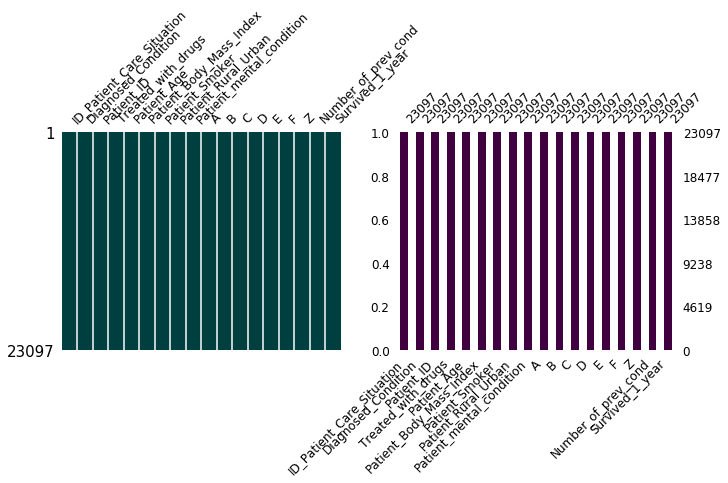

In [31]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(pharma_data, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(pharma_data, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

# Exploratory Data Analysis

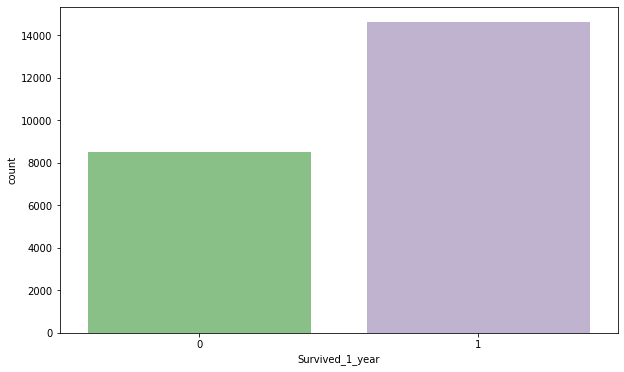

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',data= pharma_data,palette='Accent')

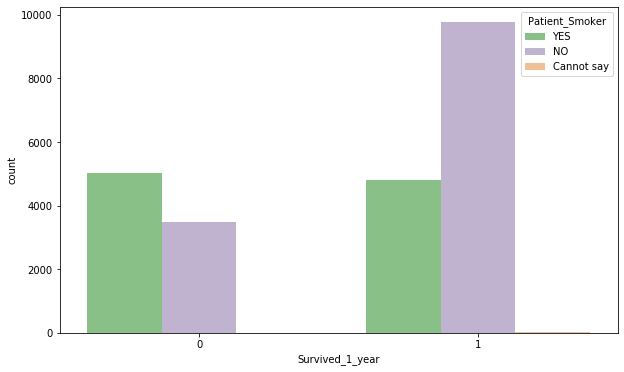

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Smoker',data= pharma_data,palette='Accent')

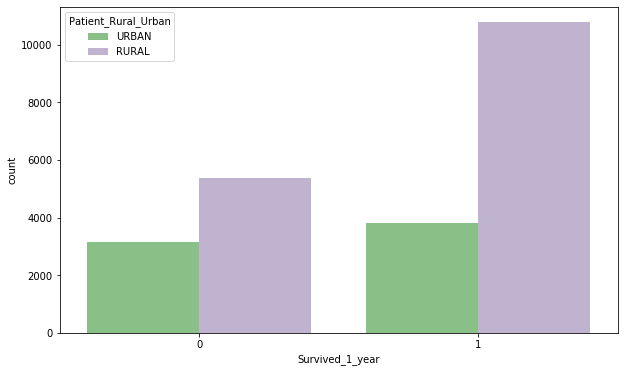

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Rural_Urban',data= pharma_data,palette='Accent')

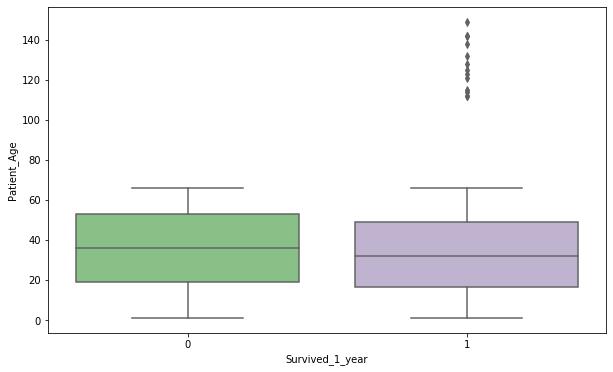

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Age',data=pharma_data,palette='Accent')

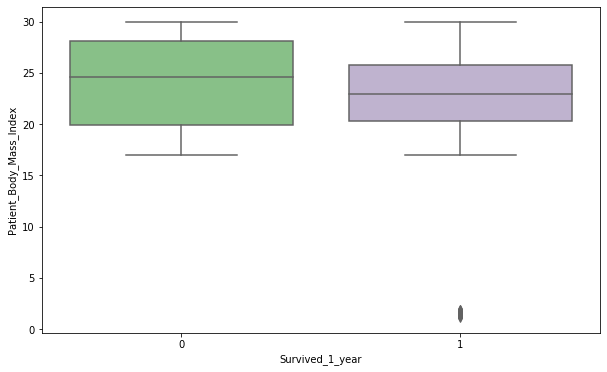

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Body_Mass_Index',data=pharma_data,palette='Accent')

some strange values Patient_Body_Mass_Index <= 14 indicate outliers

In [37]:
#drop the outliers
pharma_data = pharma_data.drop(pharma_data[pharma_data['Patient_Body_Mass_Index'] <= 14].index,axis=0)

plt.figure(figsize=(10, 6))
sns.countplot(x='Patient_Smoker',data=pharma_data,palette='Accent')

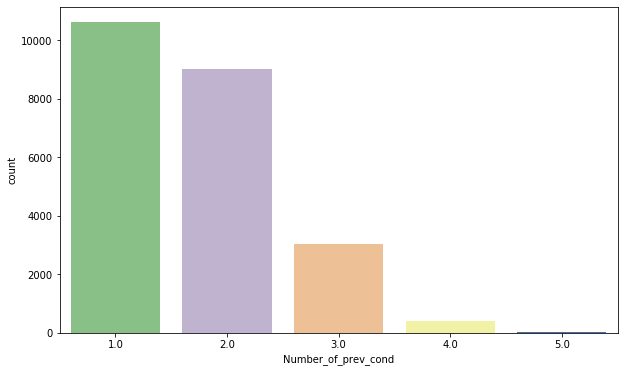

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_prev_cond',data=pharma_data,palette='Accent')

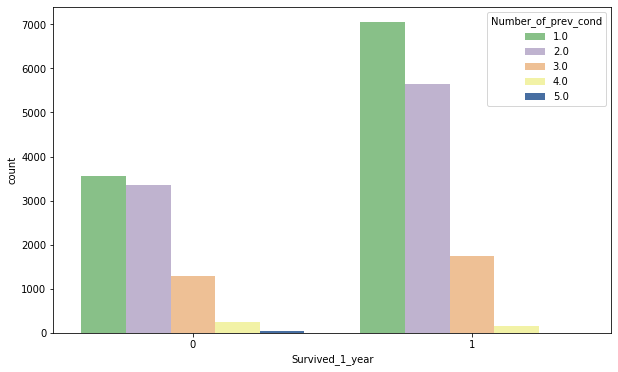

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Number_of_prev_cond',data= pharma_data,palette='Accent')

In [40]:
pharma_data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.005747,-0.001457,-0.001571,-0.001673,0.008101,0.004536,0.009882,-0.006648,-0.000293,0.007315,NaN,0.009550,-0.005432
Diagnosed_Condition,-0.005747,1.000000,0.010052,-0.002311,0.002631,0.002414,0.002684,-0.004094,-0.008484,0.005300,0.005087,NaN,0.001880,-0.003699
Patient_ID,-0.001457,0.010052,1.000000,0.007280,-0.017735,-0.001756,-0.012065,-0.006388,-0.004690,0.000348,0.007522,NaN,-0.008381,-0.004965
Patient_Age,-0.001571,-0.002311,0.007280,1.000000,0.011911,-0.015157,-0.010127,-0.008523,0.008016,-0.003187,0.009374,NaN,-0.010962,-0.084525
Patient_Body_Mass_Index,-0.001673,0.002631,-0.017735,0.011911,1.000000,0.010557,-0.000404,-0.019742,-0.010305,-0.009015,-0.016955,NaN,-0.020041,-0.120521
A,0.008101,0.002414,-0.001756,-0.015157,0.010557,1.000000,-0.071190,-0.098596,-0.081789,-0.175887,-0.058962,NaN,0.147524,-0.042209
B,0.004536,0.002684,-0.012065,-0.010127,-0.000404,-0.071190,1.000000,-0.011038,0.004275,-0.000853,-0.010940,NaN,0.401584,-0.054406
C,0.009882,-0.004094,-0.006388,-0.008523,-0.019742,-0.098596,-0.011038,1.000000,0.015022,-0.005850,0.006861,NaN,0.455816,-0.039511
D,-0.006648,-0.008484,-0.004690,0.008016,-0.010305,-0.081789,0.004275,0.015022,1.000000,-0.000593,-0.005818,NaN,0.327382,-0.107571
E,-0.000293,0.005300,0.000348,-0.003187,-0.009015,-0.175887,-0.000853,-0.005850,-0.000593,1.000000,0.004803,NaN,0.559714,0.008799


In [41]:
corr_matrix = pharma_data.corr()
print(corr_matrix["Survived_1_year"].sort_values(ascending=False))

Survived_1_year              1.000000
E                            0.008799
F                            0.000403
Diagnosed_Condition         -0.003699
Patient_ID                  -0.004965
ID_Patient_Care_Situation   -0.005432
C                           -0.039511
A                           -0.042209
B                           -0.054406
Patient_Age                 -0.084525
Number_of_prev_cond         -0.091658
D                           -0.107571
Patient_Body_Mass_Index     -0.120521
Z                                 NaN
Name: Survived_1_year, dtype: float64


# One Hot Encoding

## Converting Categorical Features

In [45]:
pharma_data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [46]:
pharma_data = pd.concat([pharma_data,pd.get_dummies(pharma_data['Patient_Smoker'],prefix='d',drop_first=True)],axis=1)

In [47]:
pharma_data = pd.concat([pharma_data,pd.get_dummies(pharma_data['Patient_Rural_Urban'],prefix='d')],axis=1)

In [48]:
pharma_data = pd.concat([pharma_data,pd.get_dummies(pharma_data['Patient_mental_condition'],prefix='d')],axis=1)

In [49]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,D,E,F,Z,Number_of_prev_cond,Survived_1_year,d_YES,d_RURAL,d_URBAN,d_Stable
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,0.0,1.0,0.0,0.0,2.0,0,1,0,1,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,...,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1


## Handling Treated_with_drugs column

In [50]:
#convert to category dtype
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].astype('category')

In [51]:
pharma_data.dtypes

ID_Patient_Care_Situation       int64
Diagnosed_Condition             int64
Patient_ID                      int64
Treated_with_drugs           category
Patient_Age                     int64
Patient_Body_Mass_Index       float64
Patient_Smoker                 object
Patient_Rural_Urban            object
Patient_mental_condition       object
A                             float64
B                             float64
C                             float64
D                             float64
E                             float64
F                             float64
Z                             float64
Number_of_prev_cond           float64
Survived_1_year                 int64
d_YES                           uint8
d_RURAL                         uint8
d_URBAN                         uint8
d_Stable                        uint8
dtype: object

In [52]:
#use .cat.codes to create new colums with encoded value
pharma_data['Treated_with_drugs_cat'] = pharma_data['Treated_with_drugs'].cat.codes

In [53]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,E,F,Z,Number_of_prev_cond,Survived_1_year,d_YES,d_RURAL,d_URBAN,d_Stable,Treated_with_drugs_cat
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,1.0,0.0,0.0,2.0,0,1,0,1,1,31
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,0.0,0.0,0.0,1.0,1,1,1,0,1,16
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0.0,0.0,0.0,1.0,0,1,1,0,1,31
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,0.0,0.0,0.0,1.0,1,0,0,1,1,0
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,...,0.0,0.0,0.0,1.0,0,1,0,1,1,31


In [54]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year', 'd_YES', 'd_RURAL', 'd_URBAN', 'd_Stable',
       'Treated_with_drugs_cat'],
      dtype='object')

In [55]:
pharma_data.shape

(23084, 23)

# Separating Input and Output Variables

In [56]:
X = pharma_data.drop(['Survived_1_year','Patient_mental_condition','Patient_Rural_Urban','Patient_Smoker','Treated_with_drugs'],axis=1)

y = pharma_data['Survived_1_year']

In [57]:
X.shape

(23084, 18)

# Split The Data

In [58]:
#train test split
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [60]:
print('X_train:,y_train:',X_train.shape,y_train.shape)

X_train:,y_train: (18467, 18) (18467,)


In [61]:
print('X_test:,y_test:',X_test.shape,y_test.shape)

X_test:,y_test: (4617, 18) (4617,)


# Model Building

## XGBOOST



In [62]:
## Hyper Parameter Optimization

params ={
 "n_estimators": [300,600,800,1000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [63]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [64]:
Xgb_classifier = XGBClassifier(random_state= 0)

In [65]:
random_search = RandomizedSearchCV(Xgb_classifier,param_distributions=params,
                                   n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [66]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.2min finished



 Time taken: 0 hours 2 minutes and 13.71 seconds.


In [67]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
random_search.best_params_

{'n_estimators': 300,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [69]:
random_search.best_score_

0.870038337615475

In [70]:
class_1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
score=cross_val_score(class_1,X,y,cv=10)

In [72]:
score

array([0.84105673, 0.83369424, 0.83109571, 0.82459939, 0.82495667,
       0.83232236, 0.83535529, 0.83102253, 0.81932409, 0.83665511])

In [73]:
score.mean()

0.8310082129081217

# The new Data for Valdition and for Submissions

In [69]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [70]:
test_new.shape

(9303, 17)

In [71]:
test_new.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
dtype: object

In [72]:
test_new['Patient_Smoker'].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [73]:
test_new=pd.concat([test_new,pd.get_dummies(test_new['Patient_Smoker'],prefix='d')],axis=1)

In [74]:
test_new['Patient_Rural_Urban'].value_counts()

RURAL    6502
URBAN    2801
Name: Patient_Rural_Urban, dtype: int64

In [75]:
test_new=pd.concat([test_new,pd.get_dummies(test_new['Patient_Rural_Urban'],prefix='d')],axis=1)

In [76]:
test_new['Patient_mental_condition'].value_counts()

Stable    9303
Name: Patient_mental_condition, dtype: int64

In [77]:
test_new = pd.concat([test_new,pd.get_dummies(test_new['Patient_mental_condition'],prefix='d')],axis=1)

In [78]:
#convert to numeric
#convert to category dtype
test_new['Treated_with_drugs'] = test_new['Treated_with_drugs'].astype('category')
test_new.dtypes

ID_Patient_Care_Situation       int64
Diagnosed_Condition             int64
Patient_ID                      int64
Treated_with_drugs           category
Patient_Age                     int64
Patient_Body_Mass_Index       float64
Patient_Smoker                 object
Patient_Rural_Urban            object
Patient_mental_condition       object
A                             float64
B                             float64
C                             float64
D                             float64
E                             float64
F                             float64
Z                             float64
Number_of_prev_cond           float64
d_NO                            uint8
d_YES                           uint8
d_RURAL                         uint8
d_URBAN                         uint8
d_Stable                        uint8
dtype: object

In [79]:
#use .cat.codes to create new colums with encoded value
test_new['Treated_with_drugs_cat'] = test_new['Treated_with_drugs'].cat.codes
test_new.head(5)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,E,F,Z,Number_of_prev_cond,d_NO,d_YES,d_RURAL,d_URBAN,d_Stable,Treated_with_drugs_cat
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,...,1.0,0.0,0.0,2.0,1,0,1,0,1,24
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,...,0.0,0.0,0.0,2.0,1,0,0,1,1,31
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,...,1.0,0.0,0.0,2.0,1,0,1,0,1,29
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,...,1.0,0.0,0.0,3.0,1,0,0,1,1,31
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,...,0.0,0.0,0.0,1.0,1,0,1,0,1,24


In [80]:
test_new=test_new.drop(['Patient_mental_condition','Patient_Rural_Urban','Patient_Smoker','Treated_with_drugs'],axis=1)

In [81]:
test_new.shape

(9303, 19)

In [82]:
test_new.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,d_NO,d_YES,d_RURAL,d_URBAN,d_Stable,Treated_with_drugs_cat
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,24
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,31
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,29
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1,31
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,24
5,28169,9,2508,40,27.085641,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,1
6,5672,4,5467,3,21.248985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,31
7,2325,9,7725,35,18.428610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1,24
8,31840,24,122,23,19.061391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,31
9,12699,30,11066,3,23.265954,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1,0,0,1,1,31


# Predictions

## Submission


In [91]:
Survived_1_year = random_search.best_estimator_.predict(test_new)

In [92]:
res = pd.DataFrame(Survived_1_year)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("Survived_1_year_prediction_results_HP.csv")      # the csv file will be saved locally on the same location where this notebook is located.